<a href="https://colab.research.google.com/github/eyvonne/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/Eyve_Geo_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [0]:
verticalLine=[[2,2,2,2,2],[1,2,3,4,5]]


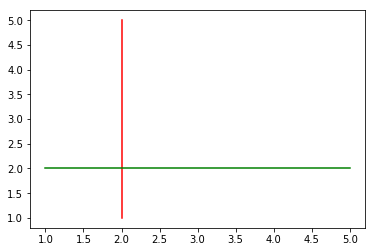

In [3]:
plt.plot(verticalLine[0],verticalLine[1], color='red')
plt.plot(verticalLine[1],verticalLine[0], color='green')

the red line does not pass the vertical line test, the green one does. 

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

for each input a function can have one and only one output. If a function is defined in terms of x input the y output can only be a single point on a vertical line positioned at x

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

2 is a function

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m takes in three dimensions and outputs up to three 

n takes in four and outputs two. Possibly three? I don't know 

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

yes- f(x)=x^2 takes in one dimension and outputs two 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

![alt text](https://raw.githubusercontent.com/eyvonne/csvFiles/master/Scanned%20Documents.png)

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
Q=np.array([[4,-1,5],[1,2,1],[2,3,2]])
P=np.array([[1,-1],[3,2]])
P=P.T
Q=Q.T
inpu=np.array([3,6,9])
np.matmul(Q,inpu)

array([36, 36, 39])

In [5]:
inpu=np.array([3,6])
np.matmul(P,inpu)

array([21,  9])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

an eigenvector is the vector around which any matrix transformation rotates around. The eigenvalue is the amount of strech applied to the eigenvector

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

human brains aren't great at imagining things in higher than 3 dimensions. 

the more dimensions that data has compared to its features there is a possibility of overfitting. 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

five times the number of parameters=observations

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
irisDF=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#create a second copy of the data to use sklearn on
irisDF2=pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
irisDF.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [3]:
#take the means of each feature
features=iris['feature_names']

X=irisDF[features].values
means=np.mean(X.T, axis=1)
print(means)

[5.84333333 3.05733333 3.758      1.19933333]


In [4]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
np.std(irisDF)

sepal length (cm)    0.825301
sepal width (cm)     0.434411
petal length (cm)    1.759404
petal width (cm)     0.759693
target               0.816497
dtype: float64

In [0]:
#center the data
CenteredData=X-means
#CenteredData

In [17]:
#take the standard deviation of each 
std=np.std(CenteredData, axis=0)
std

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [0]:
#do the standardization
StandardizedData=CenteredData/std
StandardizedData

In [9]:
#calculate the covariance table 
cov=np.cov(StandardizedData)
cov

array([[ 1.25555467,  0.64274656,  0.93136433, ..., -0.57550534,
        -0.15217751, -0.43781652],
       [ 0.64274656,  0.32932363,  0.47960106, ..., -0.29454638,
        -0.07136922, -0.21971074],
       [ 0.93136433,  0.47960106,  0.71901892, ..., -0.4286891 ,
        -0.05131394, -0.27998207],
       ...,
       [-0.57550534, -0.29454638, -0.4286891 , ...,  0.27455075,
         0.08206143,  0.19511148],
       [-0.15217751, -0.07136922, -0.05131394, ...,  0.08206143,
         0.17785121,  0.14690987],
       [-0.43781652, -0.21971074, -0.27998207, ...,  0.19511148,
         0.14690987,  0.2246618 ]])

In [0]:
#get the eigenvalues and vectors of the cov matrix
values, vectors=np.linalg.eig(cov)

In [0]:
projected=vectors.dot(CenteredData)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
Z=scaler.fit_transform(irisDF2[features])
#z is the standardized data

pca=PCA(4)
pca.fit(Z)

b=pca.transform(Z)

In [12]:
projected[-10:]

array([[ 9.34246202e-01+0.31942888j, -1.29207612e-01+0.09622556j,
         1.76968429e+00+0.4884561j ,  7.65384597e-01+0.36340779j],
       [ 8.23253798e-01-0.36365971j, -1.06843660e-01-0.45914911j,
         1.33546503e+00-0.44041406j,  6.85618450e-01-0.16385519j],
       [-6.05253806e-01+0.14906725j, -5.45030139e-02+0.04375685j,
        -4.64568550e-01+0.12311127j, -1.92794693e-01+0.12964826j],
       [-1.09103986e-01+0.45325805j,  3.63747166e-01+0.31030404j,
        -8.02711287e-01+0.34853444j, -1.72931990e-01+0.16637031j],
       [ 4.91651647e-01+0.20818294j,  9.62478385e-02+0.09115791j,
         1.39733523e+00+0.12659608j,  6.48115999e-01-0.14364319j],
       [ 1.27758077e+00+0.02498324j,  3.04067890e-03-0.23210482j,
         2.61772813e+00+0.11095369j,  9.90216924e-01-0.12853809j],
       [-8.38408320e-01-0.31683154j,  2.63158481e-01-0.04194284j,
        -1.68578538e+00-0.42559364j, -8.57912879e-01-0.1974511j ],
       [-7.42678655e-01-0.42898982j, -3.98028690e-02-0.1080912j ,
   

In [14]:
b[0:10]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281],
       [-2.07563095,  1.48917752,  0.02696829, -0.00660818],
       [-2.44402884,  0.0476442 ,  0.3354704 ,  0.03677556],
       [-2.23284716,  0.22314807, -0.0886955 ,  0.0246121 ],
       [-2.33464048, -1.11532768,  0.14507686,  0.02685922],
       [-2.18432817, -0.46901356, -0.25376557,  0.03989929]])

In [15]:
StandardizedData==Z

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
 

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)